In [74]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 10
smoking_df = pd.read_csv("smoking.csv")
from pandasql import sqldf

In [76]:
def smoke_to_num(x):
    if x == "Yes":
        return 1
    else:
        return 0
smoking_df = smoking_df[["gender", "age", "marital_status", "highest_qualification", "nationality", "ethnicity", "gross_income", "region", "smoke"]]
smoking_df["smoke"] = smoking_df["smoke"].apply(smoke_to_num)

## Introduction
We have worked hard as a society to abolish smoking as a socially accepted tool. That being said, there are many that still struggle with a smoking addiction, creating lasting affects on population health, potentially drastically shortening lifespans. Our surroundings often play a large role in determining the type of lifestyle that we chose to live. Your gender, your marital status and even your education level may heavily impact your decisions and habits. For better or for worse, opinions of those around us and the surroundings that we find ourselves in can certainly influence us. What factor of life plays the most substantial role in pushing someone towards this habit and, furthermore, what can we do with this information to get people out of a lifetime of smoking?

In this report, I make a statistical conclusion about the effects that marital status, gender and education level can have on the probability that someone smokes. This data was exclusively collected from a sample of people that live in the UK, so any conclusions made are made exclusively about the population of people that live in the United Kingdom.

## Background
This data was put together by Stats4Schools and was collected from <a href = "https://www.stem.org.uk/resources/elibrary/resource/28452/large-datasets-stats4schools">stem.org.uk</a>. The dataset includes many variables that potentially play a role in determining the probability that someone smokes tobacco. The variables used in this investigation include:

<ul>
    <li><b>marital_status:</b> Marital Status (Divorced, Married, Single, etc.)</li>
    <li><b>gender:</b> (Male, Female)</li>
    <li><b>highest_qualification:</b> Highest Level of Education</li>
    <li><b>smoke: </b> Whether or not the person smokes (Yes, No)</li>
</ul>

The `smoke` column will be modified to contain ones and zeros. (1 = Yes, 0 = No)

Text(0.5, 1.0, 'Percentage of Sample that Smokes by Marital Status')

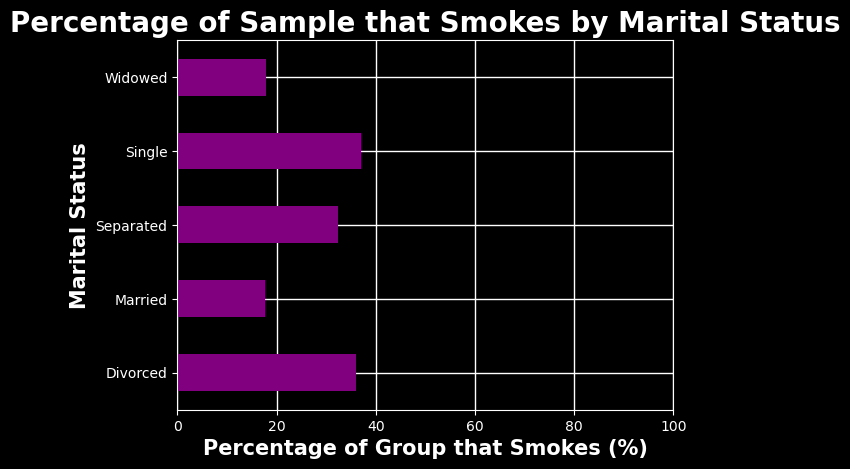

In [100]:
graph_1_df = sqldf("select marital_status, count(*) as total, sum(smoke) as total_smoke from smoking_df group by marital_status", locals())
plt.style.use("dark_background")
graph_1_df = graph_1_df.set_index("marital_status")
graph_1_df["Percentage of Group that Smokes"] = (graph_1_df["total_smoke"] / graph_1_df["total"]) * 100

ax = (graph_1_df["Percentage of Group that Smokes"]).plot.barh(color = "purple")
ax.set_xlabel("Percentage of Group that Smokes (%)", fontdict = {"fontweight": "bold", "fontsize" : 15})
ax.set_ylabel("Marital Status", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_xbound([0, 100])
ax.set_title("Percentage of Sample that Smokes by Marital Status", fontdict = {"fontsize" : 20, "fontweight": "bold"})

# Inference on Difference of Proportion of Smokers

## **Part 1:** Married vs. Single

For the sake of simplicity, and drawing real conclusions, we will just focus on the single and the married people in the `marital_status` column. At least from our sample and as you can see from the graph above, these two groups have the greatest difference in proportions. To draw a conclusion about the respective percentages from the population, we can conduct a hypothesis test as well as a confidence interval.

The graph below shows the number of smokers and non-smokers we have in our dataset from the `Single` and `Married` catagories. The total number of smokers in both is very similar but the percentage of the total number is much different. 

,total,total_smoke,non_smoke,perc_smoke
marital_status,,,,
Married,812,143,669,17.610837
Single,427,158,269,37.002342


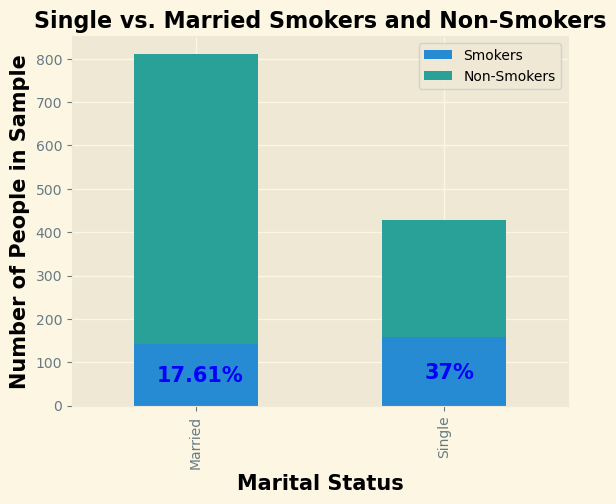

In [103]:
graph_2_df = sqldf("select marital_status, count(*) as total, sum(smoke) as total_smoke, (count(*) - sum(smoke)) as non_smoke from smoking_df where marital_status = 'Single' OR marital_status = 'Married' group by marital_status")
graph_2_df = graph_2_df.set_index("marital_status")
plt.style.use("Solarize_Light2")

ax = graph_2_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "17.61%", y = 55, x = -0.16, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.text(s = "37%", y = 63, x = 0.92, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.set_title("Single vs. Married Smokers and Non-Smokers", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Marital Status", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

graph_3_df = graph_2_df
graph_3_df["perc_smoke"] = 100 * graph_3_df["total_smoke"] / graph_3_df["total"]

graph_3_df

<div style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif; line-height: 1.6;">

  <h2 style="color: #4CAF50; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Hypothesis Testing</h2>
  
  <p style="font-size: 18px; font-weight: bold; margin-top: 10px;">
    Using a significance level of \( \alpha = 0.05 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 1: Model Statement</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Single} \sim \text{Binomial}(158, p_\text{Single}) \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Married} \sim \text{Binomial}(143, p_\text{Married}) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 2: State Hypotheses</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_0: p_\text{Single} = p_\text{Married} \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_\alpha: p_\text{Single} > p_\text{Married} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 3: Test Statistic and Null Distribution</h3>
  <p style="text-align: center; font-size: 18px;">
    <b>Test Statistic and Null Distribution for Difference of Proportions:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: #555;">
    \( Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim N(0, 1) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 4: Identify Relevant Outcomes</h3>
  <p style="text-align: center; font-size: 20px;">
    \(\text{Single vs. Married Test Statistic} = 7.564\)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 5: Calculate a P-Value</h3>
  <p style="text-align: center; font-size: 18px; color: #555;">
    \( \text{P-Value} = P(Z \geq |z|) \)
  </p>
  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    \( \text{Single vs. Married P-Value} = 1.953993 \times 10^{-14} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 6: Interpret in Context</h3>
  <p style="font-size: 18px;">
    Our calculated P-Value is much smaller than our significance level of \( 0.05 \), providing significant evidence that the true proportion of single people who smoke in the UK is not equal to the proportion of married people who smoke. 
  </p>
  <p style="font-size: 18px;">
    Although it may already be clear which proportion is likely larger, we can confirm this using a confidence interval.
  </p>

  <h2 style="color: lightblue; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Confidence Interval (C = 0.95)</h2>
  
  <p style="font-size: 18px; font-weight: bold;">General Formula for Confidence Interval:</p>
  <p style="text-align: center; font-size: 22px; color: lightblue;">
    \( \text{Point Estimate} \pm \text{Quantile Confidence Score * Standard Error of PE} \)
  </p>

  <p style="font-size: 18px; font-weight: bold;">Confidence Interval for Difference in Proportions:</p>
  <p style="font-size: 18px;">
    Using the <b>Agresti-Coull Adjustment:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: lightblue;">
    \( \hat{p_{1AC}} - \hat{p_{2AC}} \pm \text{qnorm}(C + (1-C)/2) \cdot \sqrt{\frac{\hat{p}_{1AC}(1-\hat{p}_{1AC})}{n_1+2} + \frac{\hat{p}_{2AC}(1-\hat{p}_{2AC})}{n_2+2}} \)
  </p>
  <p style="text-align: center; font-size: 22px; color: lightblue;">
    \( \frac{158 + 2}{427 + 4} - \frac{143 + 2}{812 + 4} \pm \text{qnorm}(0.95 + (1-0.95)/2) \cdot \sqrt{\frac{\frac{158 + 2}{427 + 4}(1-\frac{158 + 2}{427 + 4})}{427+2} + \frac{\frac{143 + 2}{812 + 4}(1-\frac{143 + 2}{812 + 4})}{812+2}} \)
  </p>

  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    Left Bound: \( 0.141 \) &nbsp;&nbsp; | &nbsp;&nbsp; Right Bound: \( 0.246 \)
  </p>

  <h2 style="color: purple; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Conclusion:</h2>
  <p style="font-size: 18px;">
    The confidence interval created using a 95% confidence level is heavily shifted to the right and does not include zero. This provides strong evidence that the true proportion of single smokers in the UK is greater than the true proportion of married smokers in the UK.
  </p>

</div>


## **Part 2:** Male vs. Female 

An argument could be made that gender plays a role in determining whether someone might take up smoking. Certain societal pressures could provoke an addiction based on sex, but by looking at the sample data the percentages look similar enough for an argument to be made for the difference to be negligable. That being said we can perform the same kind of statistical hypothesis testing to create evidence to point towards the population proportions.

,total_smoke,total,perc_smoke,non_smoke
gender,,,,
Female,234,965,0.242487,731
Male,187,726,0.257576,539


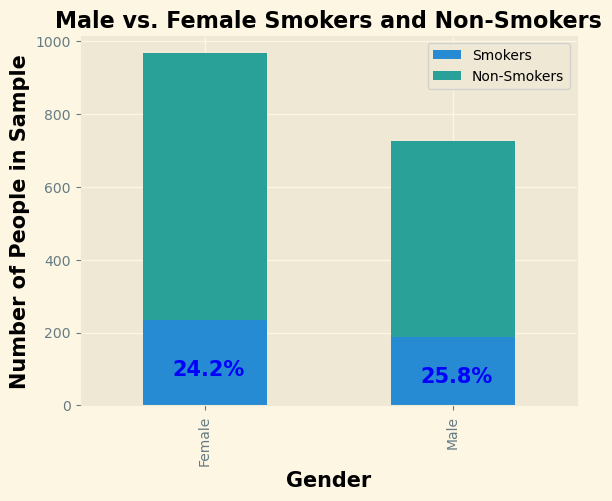

In [107]:
part_2_df = sqldf("select gender, sum(smoke) as total_smoke, count(*) as total from smoking_df group by gender ")
part_2_df["perc_smoke"] = part_2_df["total_smoke"] / part_2_df["total"]
part_2_df["non_smoke"] = part_2_df["total"] - part_2_df["total_smoke"]

part_2_df

part_2_df = part_2_df.set_index("gender")
plt.style.use("Solarize_Light2")

ax = part_2_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "24.2%", y = 82, x = -0.13, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.text(s = "25.8%", y = 63, x = 0.87, color = "blue", size = 15, fontdict = {"fontweight" : "bold"})
ax.set_title("Male vs. Female Smokers and Non-Smokers", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Gender", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

part_2_df

<div style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif; line-height: 1.6;">

  <h2 style="color: #4CAF50; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">Hypothesis Testing</h2>
  
  <p style="font-size: 18px; font-weight: bold; margin-top: 10px;">
    Using a significance level of \( \alpha = 0.05 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 1: Model Statement</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Male} \sim \text{Binomial}(158, p_\text{Female}) \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Male} \sim \text{Binomial}(143, p_\text{Female}) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 2: State Hypotheses</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_0: p_\text{Male} = p_\text{Female} \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_\alpha: p_\text{Male} \neq p_\text{Female} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 3: Test Statistic and Null Distribution</h3>
  <p style="text-align: center; font-size: 18px;">
    <b>Test Statistic and Null Distribution for Difference of Proportions:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: #555;">
    \( Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim N(0, 1) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 4: Identify Relevant Outcomes</h3>
  <p style="text-align: center; font-size: 20px;">
    \(\text{Male vs. Female Test Statistic} = 0.710\)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 5: Calculate a P-Value</h3>
  <p style="text-align: center; font-size: 18px; color: #555;">
    \( \text{P-Value} = 2 \cdot P(Z > |z|) \)
  </p>
  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    \( \text{Male vs. Female P-Value} = 0.478 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 6: Interpret in Context</h3>
  <p style="font-size: 18px;">
    Our calculated P-Value is much larger than our significance level. This means that there is strong evidence for the null hypothesis that gender has no impact on the proportion of smokers in the UK. A confidence is not necessary and we can safely disregard the idea of a difference in population proportion based on gender.
  </p>

## **Part 3:** Education Levels

Conventional wisdom may tell you that the higher education level someone has attained, the more likley they would be to maintain good health, whether that be because they know more about healthy habits or they simply have more money and time to invest into getting rid of habits such as smoking. In order to make a conclusion about how exactly education may impact the probaility of someone smoking in the UK, I have mutated the data to help find more of a concrete conclusion about this question.

`No Formal Education`:
<ul>
    <li>No Qualification</li>
</ul>

`Basic Education`:
<ul>
    <li>GCSE/O Level</li>
    <li>GCSE/CSE</li>
</ul>

`Intermediate Education`:
<ul>
    <li>A Levels</li>
    <li>ONC/BTEC</li>
    <li>Higher/Sub Degree</li>
</ul>

`Higher Education`:
<ul>
    <li>Degree</li>
</ul>

,total_smoke,total,perc_smoke,non_smoke
highest_qualification,,,,
No Formal Education,137,586,0.233788,449
Basic Education,143,410,0.348780,267
Intermediate Education,71,306,0.232026,235
Higher Education,39,262,0.148855,223


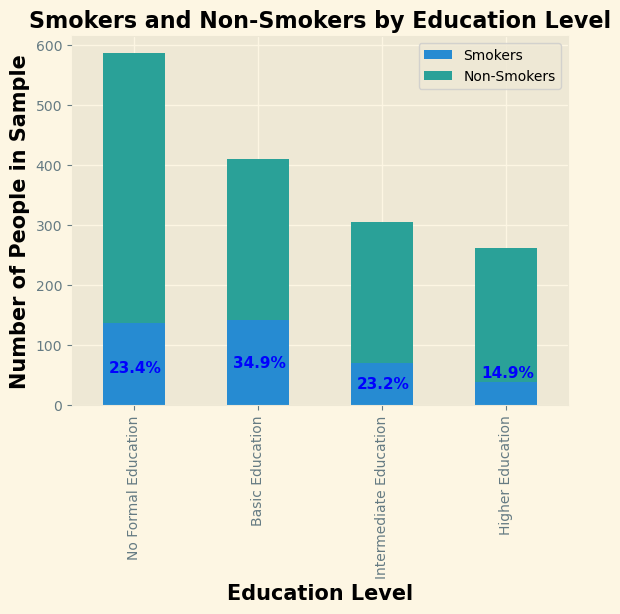

In [111]:
part_3_df = smoking_df[["highest_qualification", "smoke"]]

part_3_df = sqldf("select highest_qualification, sum(smoke) as total_smoke, count(*) as total from part_3_df group by highest_qualification")
part_3_df.loc[0] = (pd.Series({"highest_qualification": "No Formal Education", "total_smoke": 137, "total":586}))
part_3_df.loc[1] = pd.Series({"highest_qualification": "Basic Education", "total_smoke": 143, "total": 410})
part_3_df.loc[2] = pd.Series({"highest_qualification": "Intermediate Education", "total_smoke": 71, "total": 306})
part_3_df.loc[3] = pd.Series({"highest_qualification": "Higher Education", "total_smoke": 39, "total": 262})
part_3_df = part_3_df[(part_3_df["highest_qualification"] == "No Formal Education") | (part_3_df["highest_qualification"] == "Basic Education") | (part_3_df["highest_qualification"] == "Intermediate Education") | (part_3_df["highest_qualification"] == "Higher Education")]

part_3_df["perc_smoke"] = part_3_df["total_smoke"] / part_3_df["total"]
part_3_df["non_smoke"] = part_3_df["total"] - part_3_df["total_smoke"]

part_3_df

part_3_df = part_3_df.set_index("highest_qualification")
plt.style.use("Solarize_Light2")

ax = part_3_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "23.4%", y = 55, x = -0.2, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.text(s = "34.9%", y = 63, x = 0.8, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.text(s = "23.2%", y = 29, x = 1.8, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.text(s = "14.9%", y = 46, x = 2.8, color = "blue", size = 11, fontdict = {"fontweight" : "bold"})
ax.set_title("Smokers and Non-Smokers by Education Level", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Education Level", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

part_3_df

This graph shows something I would not have expected. `Basic Education`, atleast according to our sample percentages has far and away the greatest fraction of smokers. `Higher Education` people, as I would expect has the lowest percentage of smokers, but `No Formal Education` people do not have the highest as I would have predicted. Students in the `Basic Education` levels of GCSE/O Level and GCSE/CSE have passed what is really the bear minumum for people who want to pursue a well-paying job. People with `No Formal Education` likely ended their schooling after the compulsory education ended at around the age of 16. Because `Intermediate Education` and `No Formal Education` appears to have a similar sample proportion this is not worth testing to apply to the population, however, we can perform a series of tests to find conclusions about how some of the education levels relate to smoking rates.

<div style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif; line-height: 1.6;">

  <h2 style="color: #4CAF50; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">3a. No Formal Education vs. Basic Education Hypothesis Testing</h2>
  
  <p style="font-size: 18px; font-weight: bold; margin-top: 10px;">
    Using a significance level of \( \alpha = 0.05 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 1: Model Statement</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{No Formal Education} \sim \text{Binomial}(137, p_\text{No Formal Education}) \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Basic Education} \sim \text{Binomial}(143, p_\text{Basic Education}) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 2: State Hypotheses</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_0: p_\text{No Formal Education} = p_\text{Basic Education} \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_\alpha: p_\text{No Formal Education} < p_\text{Basic Education} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 3: Test Statistic and Null Distribution</h3>
  <p style="text-align: center; font-size: 18px;">
    <b>Test Statistic and Null Distribution for Difference of Proportions:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: #555;">
    \( Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim N(0, 1) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 4: Identify Relevant Outcomes</h3>
  <p style="text-align: center; font-size: 20px;">
    \(\text{No Formal Education vs. Basic Education Test Statistic} = -3.973\)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 5: Calculate a P-Value</h3>
  <p style="text-align: center; font-size: 18px; color: #555;">
    \( \text{P-Value} = P(Z \leq |z|) \)
  </p>
  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    \( \text{No Formal Education vs. Basic Education P-Value} = 3.548652 \times 10^{-5} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 6: Interpret in Context</h3>
  <p style="font-size: 18px;">
    A P-Value of 3.548652e-5 is much smaller than our significance level of 0.05 so we have enough evidence to refute the null hypothesis that the real proportion of people with a Basic Education is equal to the real proportion of people with No Formal Education. There is strong evidence that the true proportion of people with a Basic Education that smoke is greater than the true proportion of people with No Formal Education that smoke. 
  </p>

It is difficult to properly hypothesize about why this might be the case. Students that never pass their GCSE or never obtain any other equivilant qualification might experience different stresses and use different coping mechanisms. Whether a proportion of people smoke or not is largely determined by the societal norms put in place in that area. If someone leaves school early to enter a field with less smokers overall then they would not be as likely to smoke themselves. The lesson that we should take from these results should not be to discourage getting these types of qualifications but stop dangerous norms like smoking from appearing in a setting such as a school, where young people are more easily influenced and addictions are more easily created.



<div style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif; line-height: 1.6;">

  <h2 style="color: #4CAF50; text-align: left; border-bottom: 2px solid #ddd; padding-bottom: 5px;">3b. Basic Education vs. Higher Education</h2>
  
  <p style="font-size: 18px; font-weight: bold; margin-top: 10px;">
    Using a significance level of \( \alpha = 0.05 \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 1: Model Statement</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Basic Education} \sim \text{Binomial}(143, p_\text{Higher Education}) \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( X_\text{Basic Education} \sim \text{Binomial}(39, p_\text{Higher Education}) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 2: State Hypotheses</h3>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_0: p_\text{Basic Education} = p_\text{Higher Education} \)
  </p>
  <p style="text-align: center; font-size: 20px; margin: 10px 0;">
    \( H_\alpha: p_\text{Basic Education} > p_\text{Higher Education} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 3: Test Statistic and Null Distribution</h3>
  <p style="text-align: center; font-size: 18px;">
    <b>Test Statistic and Null Distribution for Difference of Proportions:</b>
  </p>
  <p style="text-align: center; font-size: 22px; color: #555;">
    \( Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim N(0, 1) \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 4: Identify Relevant Outcomes</h3>
  <p style="text-align: center; font-size: 20px;">
    \(\text{Basic Education vs. Higher Education Test Statistic} = 5.688\)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 5: Calculate a P-Value</h3>
  <p style="text-align: center; font-size: 18px; color: #555;">
    \( \text{P-Value} = P(Z \geq |z|) \)
  </p>
  <p style="text-align: center; font-size: 20px; font-weight: bold;">
    \( \text{Basic Education vs. Higher Education P-Value} = 6.426791 \times 10^{-9} \)
  </p>

  <h3 style="color: #4CAF50; text-align: left; margin-top: 20px;">Step 6: Interpret in Context</h3>
  <p style="font-size: 18px;">
    Our P-Value is yet again extremely small meaning that we have strong evidence that the true proportion of people that smoke with a basic education level is greater than the true proportion of people that smoke with a degree. These results are not particularly surprising considering we can easily relate having a higher education level to being more healthy. 
  </p>

# Relavant Heatmap

We have collected a solid amount of information about the true proportion of smokers within our dataset in certain groups. To recap the results:

<ol>
    <li>True proportion of single smokers in the UK is very likley larger than the true proportion of married smokers</li>
    <li>There is no statistical significance between the true proportion of males and females in the UK that smoke</li>
    <li>True proportion of people with a basic education level that smoke in the UK is surprisingly likely greater than the true proportion of people with no formal education that smoke in the UK</li>
    <li>True proportion of people with a basic education level that smoke in the UK is likley greater than the true proportion of people with a higher education level that smoke in the UK</li>
</ol>

To start to understand what economic and social climate breeds the largest true proportion of smokers in the UK, we can compare these factors against each other using a heatmap.

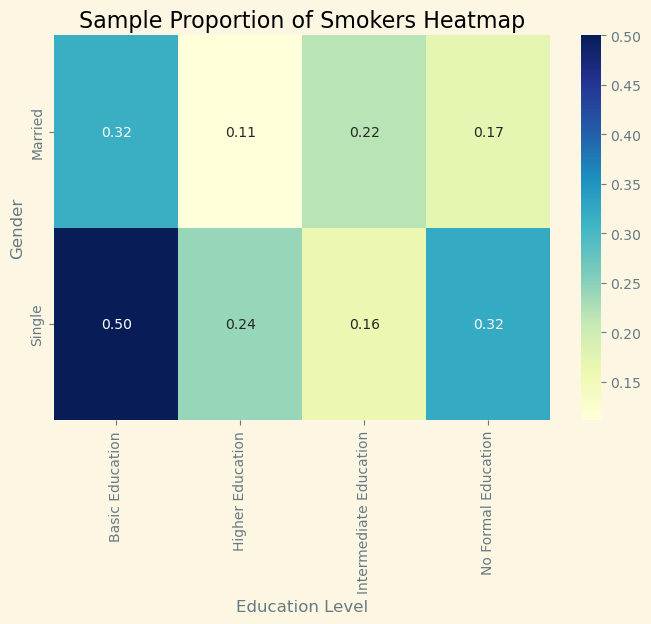

highest_qualification,Basic Education,Higher Education,Intermediate Education,No Formal Education
marital_status,,,,
Married,0.315789,0.111111,0.218182,0.170543
Single,0.500000,0.240964,0.162162,0.321429


In [118]:
heat_df = sqldf("select marital_status, highest_qualification, sum(smoke) as total_smoke, count(*) as total from smoking_df where marital_status = 'Married' or marital_status = 'Single' group by marital_status, highest_qualification")
def convert_qual(x):
    if x == "No Qualification":
        return "No Formal Education"
    elif x == "Degree":
        return "Higher Education"
    elif "GCSE" in x:
        return "Basic Education"
    else:
        return "Intermediate Education"

heat_df["highest_qualification"] = heat_df["highest_qualification"].apply(convert_qual)

heat_df = sqldf("""select marital_status, highest_qualification, total_smoke, total
from heat_df group by marital_status, highest_qualification""")
heat_df["percent"] = heat_df["total_smoke"] / heat_df["total"]


heat_df = heat_df[["marital_status", "highest_qualification", "percent"]]

heat_df = heat_df.pivot(index = "marital_status", columns = "highest_qualification", values = "percent")


plt.figure(figsize=(8, 5))
sns.heatmap(heat_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Smoking Proportions by Gender and Education Level")
plt.xlabel("Education Level")
plt.ylabel("Gender")
plt.title("Sample Proportion of Smokers Heatmap", color = "black")
plt.show()

heat_df

## Heatmap Conclusions

This heatmap gives us a good idea of where the highest proportion of smokers in the UK seem to lie. The area corresponding to `Basic Education` and `Single` is far and away the highest proportion of 50% of those in those categories in our sample identifying as smokers. This agrees with our earlier conclusion that between `Single` and `Married`, `Single` has a statistically significant greater proportion of smokers. As well as our other conclusion that among our distinct education levels, `Basic Education` has a statistically greater real proportion of smokers in the UK

# Overall Conclusions

Although only three factors were tested of many possible factors that could play into whether someone smokes, this information is still useful in understanding why some people are pushed into forming bad habits. Being single, of course, is not an inherently bad thing, but having a partner evidently may be a contributing factor into pursuing a healthy lifestyle. Another worthwhile conclusion that was made is that gender does not seem to have a real effect on smoking habits. Men in the UK have just as good of a chance to take up smoking as women. Education levels is where some very surprising findings were made. I have been made to assume, that the more education someone has access to, the more likley they will be to pursue good habits, whether that be because they are more educated regarding what is healthy and what is not or because they simply have the access/money required to build better habits. The statistical conclusions made mostly followed this pattern, but the discovery that the true UK smoking percentage of those with a `Basic Education` level is very likley greater than the true proportion of those with `No Formal Education` changed by perception on this topic.

Finally, the heatmap connected some of the other findings that were made prior and gave strong evidence that those in the `Single` and `Basic Education` categories have the greatest probability of identifying as a smoker (50%). Perhaps unsurprisingly, on the other side of the spectrum, only 11% of those in the `Married` and `Higher Education` categories in the sample data identify as smokers. 